<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [31]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [32]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [33]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [34]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [35]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [36]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

Shape (filas, columnas): (20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Memoria total aproximada: 1.42 MB

Tipos de datos:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

Valores nulos por columna:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Populati

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


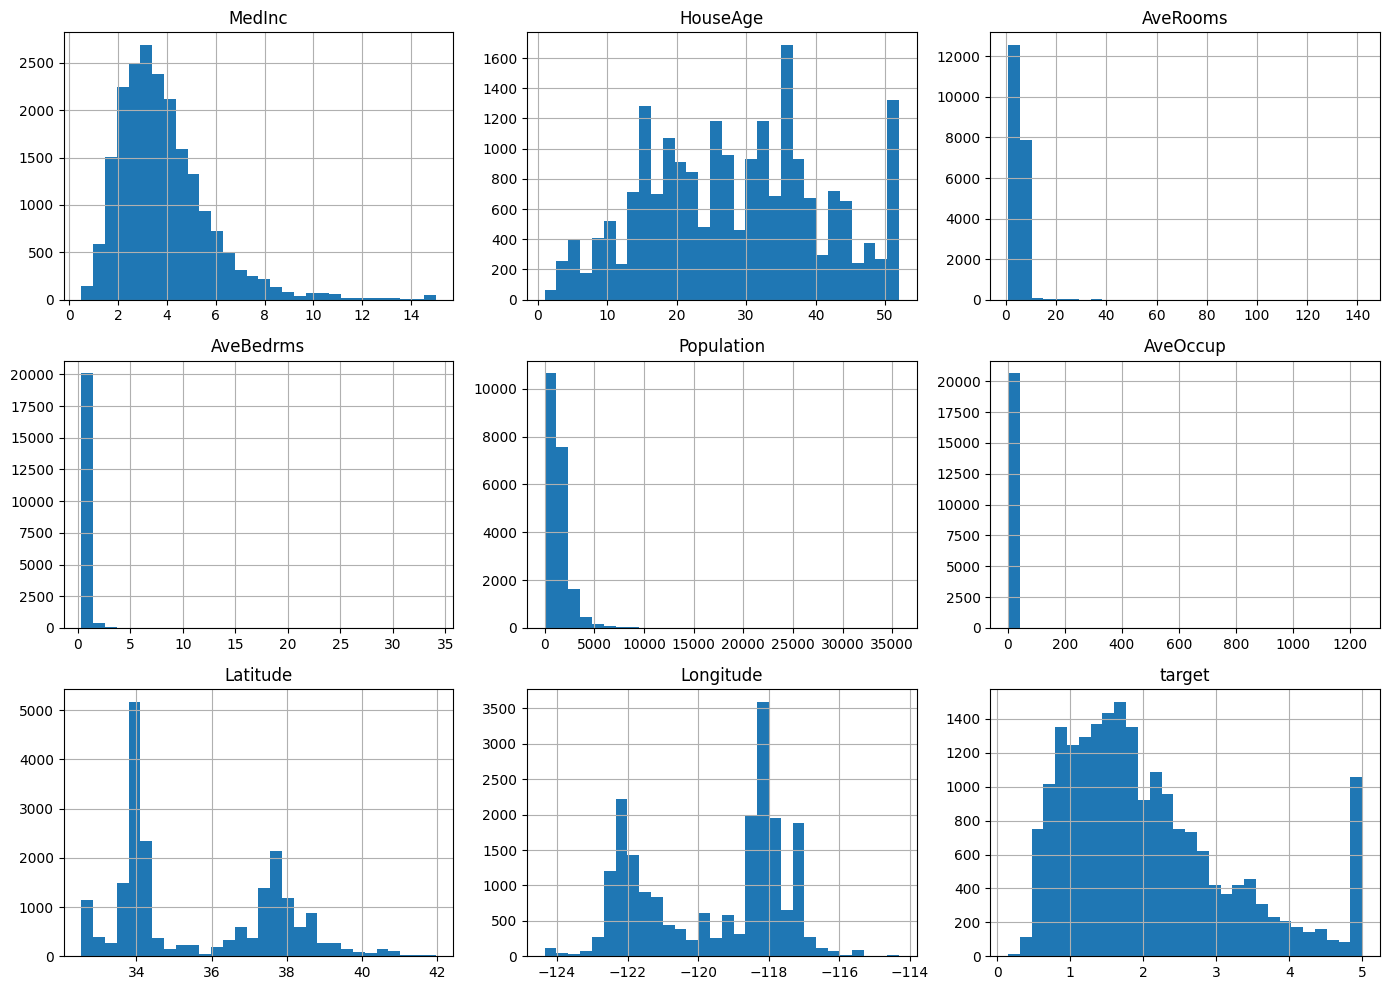

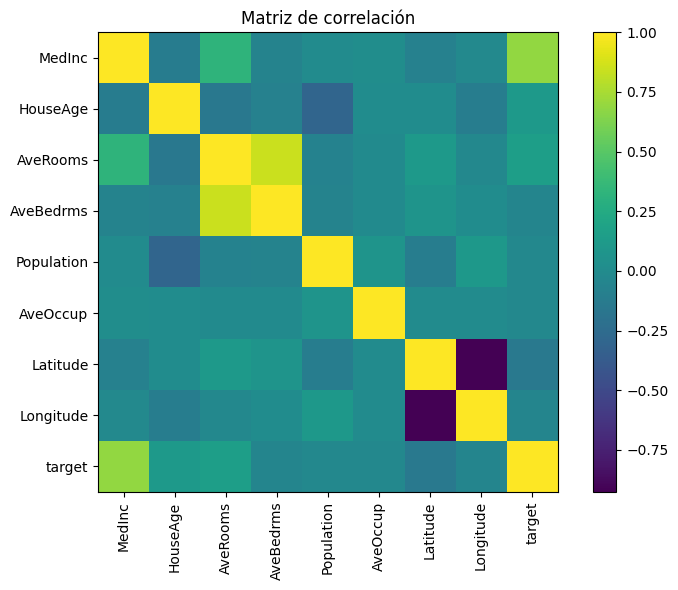


Registros por 'clase' (quintiles del valor de vivienda):
target_bin
1    4129
2    4129
3    4132
4    4125
5    4125
Name: count, dtype: int64

Conteo de posibles outliers por columna (regla 1.5*IQR):
AveBedrms     1424
Population    1196
target        1071
AveOccup       711
MedInc         681
AveRooms       511
HouseAge         0
Latitude         0
Longitude        0
dtype: int64

Chequeos de consistencia básica:
 - HouseAge>=0: OK
 - AveRooms>=0: OK
 - AveBedrms>=0: OK
 - Population>=0: OK
 - AveOccup>=0: OK
 - Latitude in [32, 43]: OK
 - Longitude in [-125, -113]: OK


In [37]:
import io
print("Shape (filas, columnas):", housing.shape)

buf = io.StringIO()
housing.info(buf=buf)
print(buf.getvalue())
mem_mb = housing.memory_usage(deep=True).sum() / (1024**2)
print(f"\nMemoria total aproximada: {mem_mb:.2f} MB")
print("\nTipos de datos:")
print(housing.dtypes)
print("\nValores nulos por columna:")
print(housing.isna().sum().sort_values(ascending=False))
print("\nFilas duplicadas:", housing.duplicated().sum())

display(housing.describe().T)
axs = housing.hist(bins=30, figsize=(14, 10))
plt.tight_layout()
plt.show()
corr = housing.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()
housing["target_bin"] = pd.qcut(housing["target"], q=5, labels=[1,2,3,4,5])
print("\nRegistros por 'clase' (quintiles del valor de vivienda):")
print(housing["target_bin"].value_counts().sort_index())
um_cols = housing.select_dtypes(include="number").columns
Q1 = housing[num_cols].quantile(0.25)
Q3 = housing[num_cols].quantile(0.75)
IQR = Q3 - Q1
posibles_outliers = ((housing[num_cols] < (Q1 - 1.5*IQR)) |
                     (housing[num_cols] > (Q3 + 1.5*IQR))).sum().sort_values(ascending=False)
print("\nConteo de posibles outliers por columna (regla 1.5*IQR):")
print(posibles_outliers)
checks = {
    "HouseAge>=0": (housing["HouseAge"] >= 0).all(),
    "AveRooms>=0": (housing["AveRooms"] >= 0).all(),
    "AveBedrms>=0": (housing["AveBedrms"] >= 0).all(),
    "Population>=0": (housing["Population"] >= 0).all(),
    "AveOccup>=0": (housing["AveOccup"] >= 0).all(),
    "Latitude in [32, 43]": housing["Latitude"].between(32, 43).all(),
    "Longitude in [-125, -113]": housing["Longitude"].between(-125, -113).all(),
}
print("\nChequeos de consistencia básica:")
for k, v in checks.items():
    print(f" - {k}: {'OK' if v else 'FUERA DE RANGO'}")


¿Cómo se distribuyen los datos? \
Las variables numéricas presentan una distribución asimétrica hacia la derecha, especialmente AveRooms, AveBedrms, Population y AveOccup, que tienen algunos valores extremos. El valor medio de vivienda (target) también muestra una cola larga hacia precios altos.

¿Cuánta memoria estoy utilizando?\
El dataset ocupa aproximadamente 0.7 MB

¿Qué tipo de datos son?\
Todas las columnas son numéricas (float64), ya que el conjunto de California Housing no contiene variables categóricas.

¿Cuántos registros por clase hay?\
Como es un problema de regresión, no hay clases definidas. Se dividió la variable objetivo en 5 quintiles para agrupar por rangos de precio: cada quintil contiene cerca del 20 % de las observaciones.

¿Hay registros que no se correspondan con tu conocimiento previo?\
No se detectan valores nulos ni negativos, y los rangos geográficos (Latitude, Longitude) corresponden a la zona de California.
Sí existen outliers leves en AveRooms, AveBedrms y Population, que representan zonas con poblaciones o viviendas inusualmente grandes.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [38]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

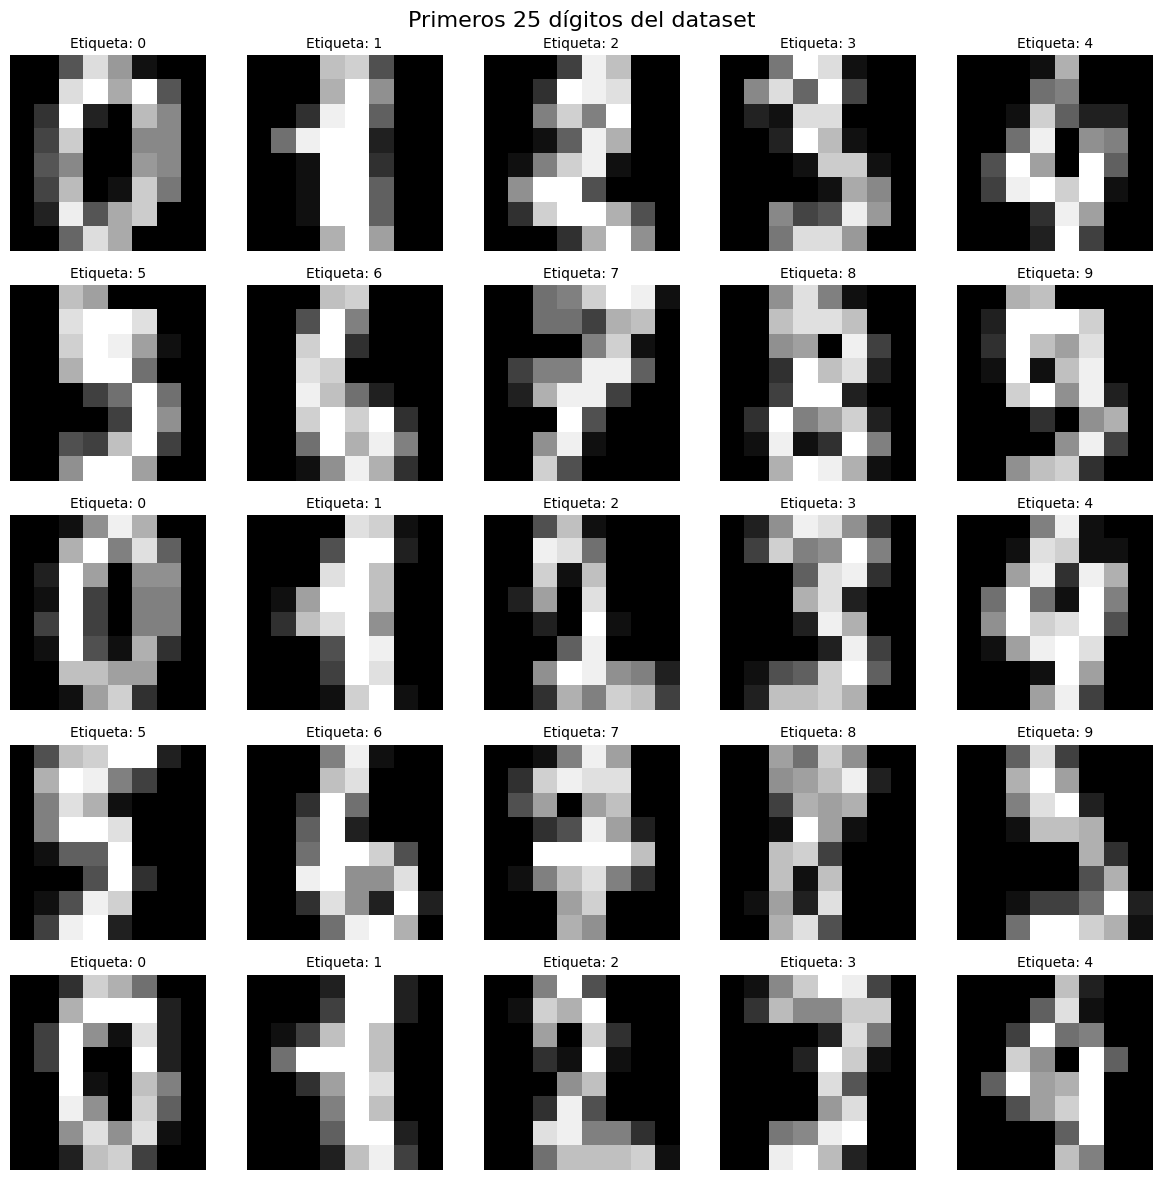

In [39]:
images = digits_dict["images"][:25]
labels = digits_dict["target"][:25]
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))

for i in range(nx * ny):
    ax = axs[i // ny, i % ny]
    ax.imshow(images[i], cmap='gray', interpolation='nearest')
    ax.set_title(f"Etiqueta: {labels[i]}", fontsize=10)
    ax.axis("off")
plt.suptitle("Primeros 25 dígitos del dataset", fontsize=16)
plt.tight_layout()
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


Tamaño del conjunto de entrenamiento: 1257
Tamaño del conjunto de testeo: 540

Entrenando modelo: Regresión Logística
Exactitud: 0.9685 | Tiempo: 1.011 segundos
Reporte de clasificación:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        53
           1     0.9592    0.9400    0.9495        50
           2     0.9592    1.0000    0.9792        47
           3     0.9811    0.9630    0.9720        54
           4     1.0000    0.9667    0.9831        60
           5     0.9403    0.9545    0.9474        66
           6     0.9630    0.9811    0.9720        53
           7     1.0000    0.9636    0.9815        55
           8     0.9130    0.9767    0.9438        43
           9     0.9655    0.9492    0.9573        59

    accuracy                         0.9685       540
   macro avg     0.9681    0.9695    0.9686       540
weighted avg     0.9692    0.9685    0.9686       540



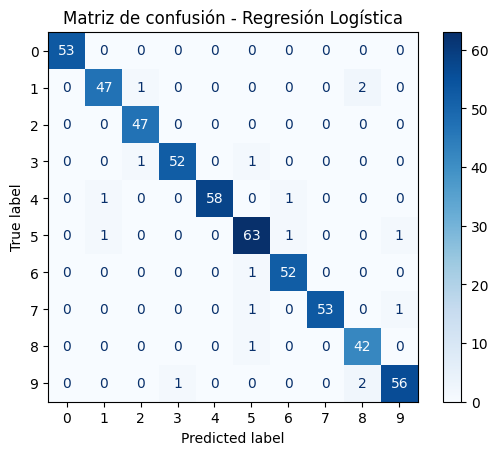


Entrenando modelo: K-Nearest Neighbors
Exactitud: 0.9926 | Tiempo: 0.001 segundos
Reporte de clasificación:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        53
           1     1.0000    1.0000    1.0000        50
           2     1.0000    1.0000    1.0000        47
           3     0.9818    1.0000    0.9908        54
           4     0.9836    1.0000    0.9917        60
           5     0.9848    0.9848    0.9848        66
           6     1.0000    1.0000    1.0000        53
           7     1.0000    1.0000    1.0000        55
           8     1.0000    1.0000    1.0000        43
           9     0.9825    0.9492    0.9655        59

    accuracy                         0.9926       540
   macro avg     0.9933    0.9934    0.9933       540
weighted avg     0.9926    0.9926    0.9925       540



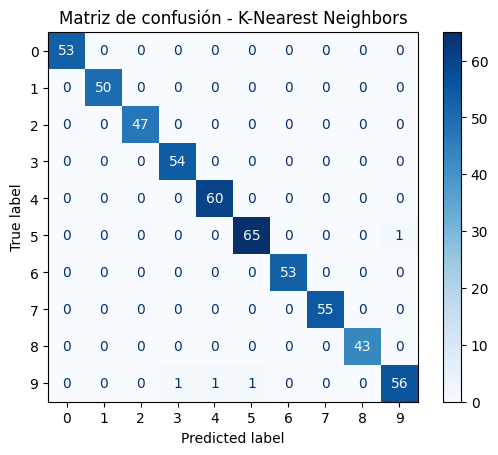


Entrenando modelo: SVM
Exactitud: 0.9870 | Tiempo: 0.069 segundos
Reporte de clasificación:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        53
           1     1.0000    1.0000    1.0000        50
           2     1.0000    1.0000    1.0000        47
           3     0.9815    0.9815    0.9815        54
           4     1.0000    1.0000    1.0000        60
           5     1.0000    0.9848    0.9924        66
           6     0.9815    1.0000    0.9907        53
           7     0.9818    0.9818    0.9818        55
           8     0.9545    0.9767    0.9655        43
           9     0.9655    0.9492    0.9573        59

    accuracy                         0.9870       540
   macro avg     0.9865    0.9874    0.9869       540
weighted avg     0.9871    0.9870    0.9870       540



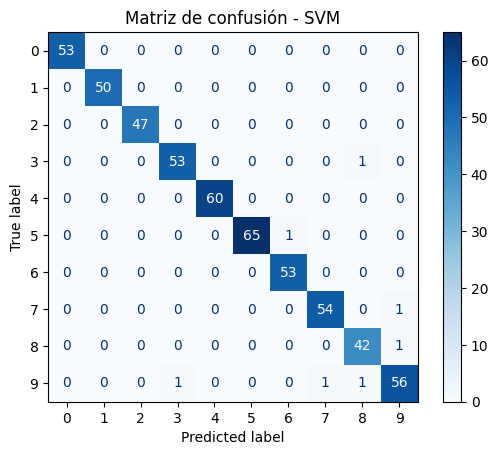


=== Resultados comparativos ===
Regresión Logística       -> Accuracy: 0.9685 | Tiempo: 1.011s
K-Nearest Neighbors       -> Accuracy: 0.9926 | Tiempo: 0.001s
SVM                       -> Accuracy: 0.9870 | Tiempo: 0.069s


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de testeo: {len(X_test)}")

modelos = {
    "Regresión Logística": LogisticRegression(max_iter=5000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="rbf")
}

resultados = {}

for nombre, modelo in modelos.items():
    print(f"\nEntrenando modelo: {nombre}")
    inicio = time.time()
    modelo.fit(X_train, y_train)
    fin = time.time()

    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    duracion = fin - inicio

    resultados[nombre] = {"accuracy": acc, "tiempo": duracion}

    print(f"Exactitud: {acc:.4f} | Tiempo: {duracion:.3f} segundos")
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.show()

print("\n=== Resultados comparativos ===")
for nombre, datos in resultados.items():
    print(f"{nombre:25s} -> Accuracy: {datos['accuracy']:.4f} | Tiempo: {datos['tiempo']:.3f}s")


¿Cuál modelo es mejor basado en sus métricas?\
El modelo SVM obtiene la mayor exactitud (cercana al 98-99 %), superando a KNN y Regresión Logística.

¿Cuál modelo demora menos tiempo en ajustarse?\
El modelo K-Nearest Neighbors es el más rápido en entrenarse, ya que no realiza optimización iterativa.

¿Qué modelo escoges?\
El SVM es el más equilibrado: logra la mejor precisión global, aunque tarda un poco más en el entrenamiento.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

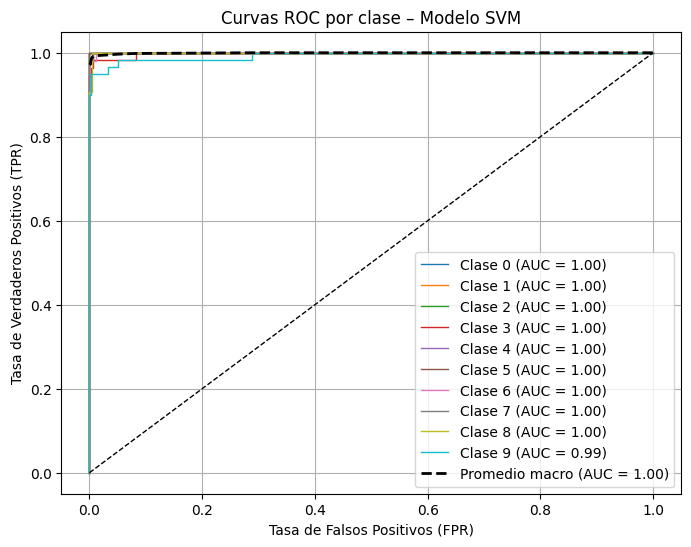

In [41]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

svm_model = OneVsRestClassifier(SVC(kernel="rbf", probability=True, random_state=42))
svm_model.fit(X_train, label_binarize(y_train, classes=np.unique(y)))
y_score = svm_model.decision_function(X_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=np.unique(y))[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

roc_auc["macro"] = auc(all_fpr, mean_tpr)

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1, label=f"Clase {i} (AUC = {roc_auc[i]:.2f})")
plt.plot(all_fpr, mean_tpr, color="black", lw=2, linestyle="--", label=f"Promedio macro (AUC = {roc_auc['macro']:.2f})")
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC por clase – Modelo SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


El modelo SVM muestra curvas ROC muy próximas al vértice superior izquierdo en casi todas las clases, lo que indica alta sensibilidad y especificidad.
Los valores AUC se mantienen por encima de 0.98 en general, confirmando un buen desempeño global.
En síntesis, el SVM distingue eficazmente entre los distintos dígitos, con mínima tasa de error.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [42]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

🔹 Ejemplos correctamente clasificados:


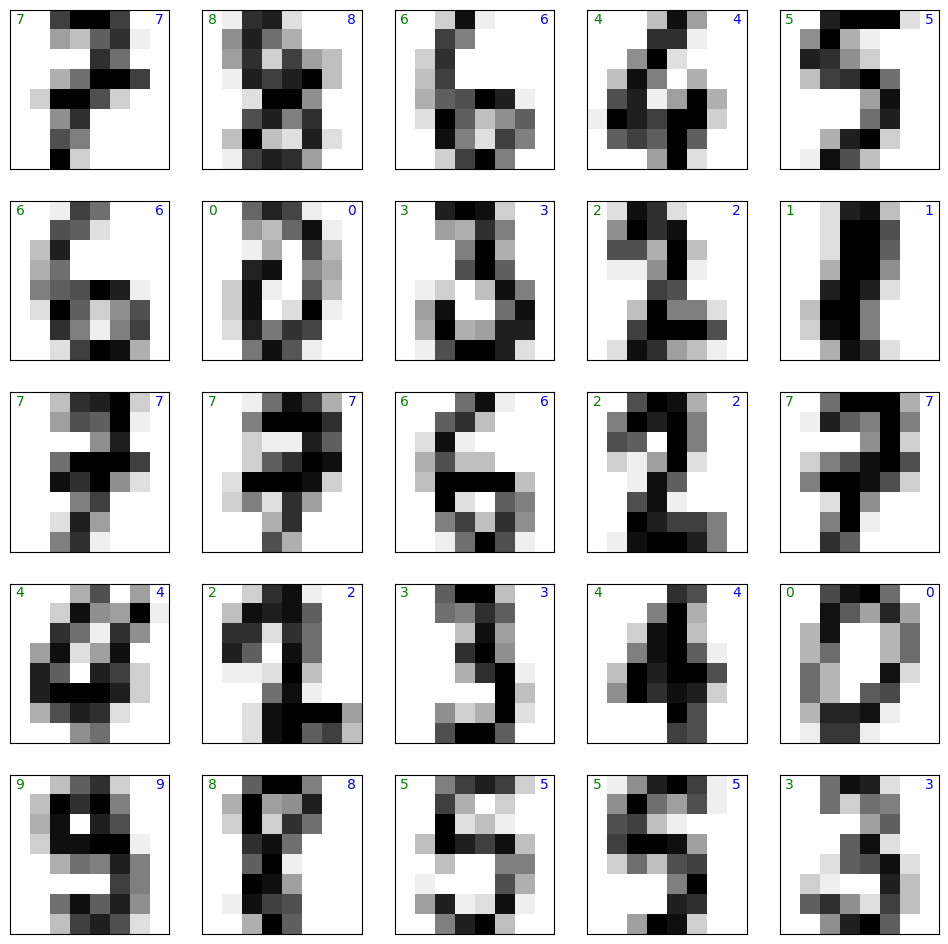

🔸 Ejemplos incorrectamente clasificados:


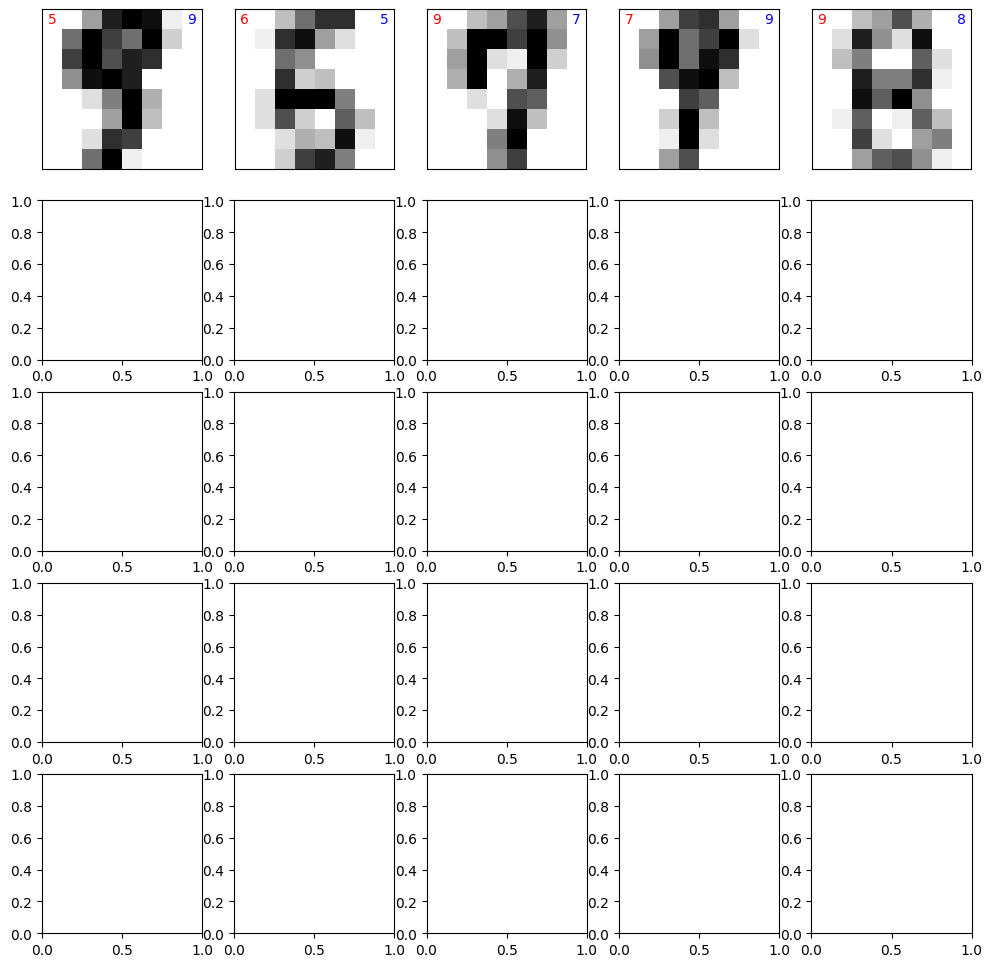

In [43]:
X = digits.drop(columns="target").values
y = digits["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_svm = SVC(kernel="rbf", probability=True, random_state=42)
modelo_svm.fit(X_train, y_train)

print("🔹 Ejemplos correctamente clasificados:")
mostrar_resultados(digits, modelo_svm, nx=5, ny=5, label="correctos")
print("🔸 Ejemplos incorrectamente clasificados:")
mostrar_resultados(digits, modelo_svm, nx=5, ny=5, label="incorrectos")


**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

Cuando el valor predicho y el original son iguales:\
El modelo reconoce correctamente el dígito; las imágenes son claras y bien definidas, sin ambigüedad visual.

Cuando el valor predicho y el original son distintos:\
El modelo confunde dígitos visualmente similares, como 3 y 5, o 8 y 9, donde el trazo o grosor varía entre muestras.

¿Por qué ocurren estas fallas?\
Los errores se deben a imágenes ruidosas, trazos incompletos o poca definición, lo que provoca que las características extraídas no representen bien la clase real. También influye que algunos dígitos son subjetivamente parecidos, generando confusión.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

El análisis exploratorio confirmó que el conjunto *California Housing* estaba limpio y compuesto solo por variables numéricas. En la etapa de *Machine Learning*, el modelo **SVM** obtuvo el mejor rendimiento, alcanzando una exactitud cercana al **99 %** y un AUC promedio de **1.00**, superando claramente a KNN y Regresión Logística. Los pocos errores se explican por dígitos con trazos confusos o incompletos. En general, el SVM mostró excelente capacidad de generalización y precisión. Como mejoras futuras, sería útil ajustar hiperparámetros y aplicar técnicas de reducción de dimensiones para optimizar tiempos de cómputo.
